In [513]:
import matplotlib.pyplot as plt
import numpy as np


In [514]:
class dot:
    def __init__(self, x:int, y:int):
        self.x = x
        self.y = y
        
    def __str__(self):
        return f"dot({self.x}, {self.y})"
        
        
def get_dots_lists(input_dots):
    x_list = []
    y_list = []
    
    for dot in input_dots:
        x_list.append(dot.x)
        y_list.append(dot.y)
        
    return x_list, y_list
    


In [515]:
enter_dots = [
    dot(1, 1),
    dot(2, 2)
]

move_dot = dot(1.7, 1.2)

In [516]:
class line:
    def __init__(self, k, b):
        self.k = k
        self.b = b
    
    def __init__(self, d1:dot, d2:dot):
        self.k, self.b = self.cal_k_b(d1, d2)
        
    def y(self, x:float):
        return self.k * x + self.b
    
    def len(self, x1:float, x2:float):
        y1 = self.y(x1)
        y2 = self.y(x2)
        
        return np.sqrt( (x2 - x1)**2 + (y2 - y1)**2 )
        
    def cal_k_b(self, d1:dot, d2:dot):
        k = (d1.y - d2.y) / (d1.x - d2.x)
        b = d2.y - d2.x * k
        return k, b

class final_line(line):
    def __init__(self, d1, d2):
        self.k, self.b = self.cal_k_b(d1, d2)
        self.d1 = d1
        self.d2 = d2
    
    def is_x_inside(self, x:float) ->bool:
        if (((self.d1.x <= x)and(x <= self.d2.x)) or ((self.d2.x <= x)and(x <= self.d1.x))):
            return True
        else:
            return False
    
    def is_y_inside(self, y:float) ->bool:
        if (((self.d1.y <= y)and(y <= self.d2.y)) or ((self.d2.y <= y)and(y <= self.d1.y))):
            return True
        else:
            return False
    
    def is_dot_inside(self, d:dot) -> bool:    
        return (self.is_x_inside(d.x) and self.is_y_inside(d.y))
    
    def len(self):
        return np.sqrt( (self.d1.x - self.d2.x)**2 + (self.d1.y - self.d2.y)**2 )
    
    def get_coo_by_per(self, per:float):
        line_len = self.len()
        
        line_per = line_len * per
        
        x_len = line_per / (np.sqrt(1 + self.k**2))
        
        y_len = x_len * self.k
        
        
        
        #print("k:",self.k)
        
        return dot(self.d1.x + x_len, self.d1.y + y_len)
        
        
    

In [517]:
class bez_1:
    def __init__(self, sd:dot, ed:dot, vd:dot):
        self.sd = sd
        self.ed = ed
        self.vd = vd
        
        self.fline_1 = final_line(sd, vd)
        self.fline_2 = final_line(vd, ed)
        
    def get_bez_xy_step(self, step:int, ax):
        
        x = []
        y = []
        
        for i in np.arange(0, 1.1, step):
        #for i in range(0, 100, 10):
            tem_d1 = self.fline_1.get_coo_by_per(i)
            tem_d2 = self.fline_2.get_coo_by_per(i)
            
            tem_line = final_line(tem_d1, tem_d2)
            
            x.append(tem_line.get_coo_by_per(i).x)
            y.append(tem_line.get_coo_by_per(i).y)
            ax.plot([tem_line.d1.x, tem_line.d2.x], [tem_line.d1.y, tem_line.d2.y], color = "green")
        
        return x, y
        

0.7280109889280517

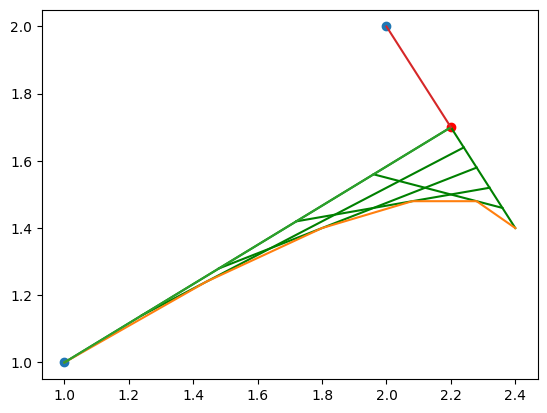

In [518]:
fig, ax = plt.subplots()


dots_x, dots_y = get_dots_lists(enter_dots)

# Start dots
ax.plot(dots_x, dots_y, 'o')

# Moveable dot
#ax.plot(move_dot.x, move_dot.y, 'o', color = "orange")


# Test dots
#test_dot_1 = get_linear_coo_by_percent(enter_dots[0], move_dot, 0.8)
#ax.plot(test_dot_1.x, test_dot_1.y, 'o', color = "purple")

fl1 = final_line(enter_dots[0], move_dot)
fl2 = final_line(move_dot, enter_dots[1])

pers = 0.5

fl_dot1 = fl1.get_coo_by_per(pers)
fl_dot2 = fl2.get_coo_by_per(pers)

flm = final_line(fl_dot1, fl_dot2)
fl_dotm = flm.get_coo_by_per(pers)

#ax.plot(fl_dot1.x, fl_dot1.y, 'o', color = "green")
#ax.plot(fl_dot2.x, fl_dot2.y, 'o', color = "green")
#ax.plot(fl_dotm.x, fl_dotm.y, 'o', color = "green")

#ax.plot([fl1.d1.x, fl1.d2.x], [fl1.d1.y, fl1.d2.y])
#ax.plot([fl2.d1.x, fl2.d2.x], [fl2.d1.y, fl2.d2.y])
#ax.plot([flm.d1.x, flm.d2.x], [flm.d1.y, flm.d2.y])

#bez = bez_1(enter_dots[0], enter_dots[1], move_dot)
#bez_x, bez_y = bez.get_bez_xy_step(0.10)
#ax.plot(bez_x, bez_y)



move_dot2 = dot(move_dot.x + 0.5, move_dot.y + 0.5)
bez = bez_1(enter_dots[0], enter_dots[1], move_dot2)
ax.plot(move_dot2.x, move_dot2.y, 'o', color = "red")
bez_x, bez_y = bez.get_bez_xy_step(0.2,ax)
ax.plot(bez_x, bez_y)


ax.plot([bez.fline_1.d1.x, bez.fline_1.d2.x], [bez.fline_1.d1.y, bez.fline_1.d2.y])
ax.plot([bez.fline_2.d1.x, bez.fline_2.d2.x], [bez.fline_2.d1.y, bez.fline_2.d2.y])


str(fl1.d1), str(fl1.d2)
fl1.len()

In [519]:
print(np.sqrt(0.019999999999999993**2 + 0.06999999999999999**2))

0.07280109889280517


!!!!!!!!!!!
